# Support Vector Classifier


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing wine data to classify
from sklearn.datasets import load_wine 

In [3]:
data = load_wine()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
x = data['data']
y = data['target']

In [7]:
x[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [8]:
y[0]

0

C:\Users\Fingers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

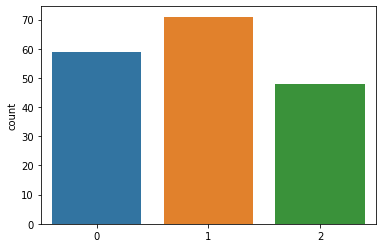

In [9]:
sns.countplot(data['target'])

In [10]:
# Selecting best features for accuracy
from sklearn.feature_selection import SelectKBest , f_classif , chi2 , mutual_info_classif
# x_f_classif = SelectKBest(f_classif,k=13).fit_transform(x,y)
# x_chi2 = SelectKBest(chi2,k=10).fit_transform(x,y)
x_new = SelectKBest(mutual_info_classif,k=13).fit_transform(x,y)

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C=0.01)
classifier.fit(x_train,y_train)

SVC(C=0.01, kernel='linear')

In [13]:
y_pred = classifier.predict(x_test)

<AxesSubplot:>

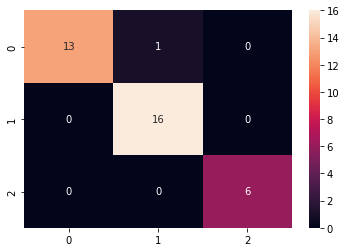

In [14]:
from sklearn.metrics import accuracy_score , confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True)

In [15]:
# accuracy of testing data
accuracy_score(y_test,y_pred)

0.9722222222222222

In [16]:
# accuracy of training data 
accuracy_score(y_train,classifier.predict(x_train))

0.9647887323943662